# Graficas

In [44]:
# Tratamiento y manipulación de datos
# -----------------------------------------------------------------------
import pandas as pd                                 # Manipulación y análisis de datos en estructuras DataFrame
import numpy as np                                  # Cálculos numéricos y manejo de arrays
import datetime          

import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
df = pd.read_csv("../datos/06_datos_minimalism.csv")
df

,Target,Target Type,Metric,Database,Summary,2022-11-08,2022-11-09,2022-11-10,2022-11-11,2022-11-12,...,2024-10-28,2024-10-29,2024-10-30,2024-10-31,2024-11-01,2024-11-02,2024-11-03,2024-11-04,2024-11-05,2024-11-06
0,minimalismbrand.com,root domain,Organic Traffic,es,4133989,6097,6105,6054,6096,6080,...,6616,6611,6582,6498,6562,6861,6923,6462,6617,6297
1,minimalismbrand.com,root domain,Organic Keywords,es,1109036,864,861,856,850,863,...,2433,2461,2475,2479,2477,2498,2538,2550,2548,2548
2,minimalismbrand.com,root domain,Organic Traffic Cost,es,2430240,2720,2722,2714,2720,2717,...,3851,3825,3804,3791,3812,3884,3911,3764,3784,3688
3,minimalismbrand.com,root domain,Paid Traffic,es,143097,136,136,136,136,136,...,307,307,307,307,307,307,307,307,307,307
4,minimalismbrand.com,root domain,Paid Keywords,es,4062,1,1,1,1,1,...,6,6,6,6,6,6,6,6,6,6
5,minimalismbrand.com,root domain,Paid Traffic Cost,es,77871,61,61,61,61,61,...,124,124,124,124,124,124,124,124,124,124


In [46]:
df_organic = df.loc[[0,3]]
df_organic

,Target,Target Type,Metric,Database,Summary,2022-11-08,2022-11-09,2022-11-10,2022-11-11,2022-11-12,...,2024-10-28,2024-10-29,2024-10-30,2024-10-31,2024-11-01,2024-11-02,2024-11-03,2024-11-04,2024-11-05,2024-11-06
0,minimalismbrand.com,root domain,Organic Traffic,es,4133989,6097,6105,6054,6096,6080,...,6616,6611,6582,6498,6562,6861,6923,6462,6617,6297
3,minimalismbrand.com,root domain,Paid Traffic,es,143097,136,136,136,136,136,...,307,307,307,307,307,307,307,307,307,307


In [47]:
df_organic = df_organic.drop(columns="Target")
df_organic = df_organic.drop(columns="Target Type")
df_organic = df_organic.drop(columns="Database")
df_organic = df_organic.drop(columns="Summary")

In [48]:
df_organic

,Metric,2022-11-08,2022-11-09,2022-11-10,2022-11-11,2022-11-12,2022-11-13,2022-11-14,2022-11-15,2022-11-16,...,2024-10-28,2024-10-29,2024-10-30,2024-10-31,2024-11-01,2024-11-02,2024-11-03,2024-11-04,2024-11-05,2024-11-06
0,Organic Traffic,6097,6105,6054,6096,6080,6124,6134,6083,6203,...,6616,6611,6582,6498,6562,6861,6923,6462,6617,6297
3,Paid Traffic,136,136,136,136,136,0,0,0,0,...,307,307,307,307,307,307,307,307,307,307


In [49]:
df = df_organic.T.reset_index()

In [50]:
df = df.drop(0)
df.reset_index(drop = True,inplace=True)

In [52]:
df = df.rename(columns={"index":"fecha",0:"Organic Traffic",3:"Paid Traffic"})

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   fecha            730 non-null    object
 1   Organic Traffic  730 non-null    object
 2   Paid Traffic     730 non-null    object
dtypes: object(3)
memory usage: 17.2+ KB


In [58]:
df["fecha"] = pd.to_datetime(df["fecha"])
df["Organic Traffic"] = df["Organic Traffic"].astype(int)
df["Paid Traffic"] = df["Paid Traffic"].astype(int) 

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   fecha            730 non-null    datetime64[ns]
 1   Organic Traffic  730 non-null    int64         
 2   Paid Traffic     730 non-null    int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 17.2 KB


In [60]:
df.to_csv("../datos/08_trafico.csv")

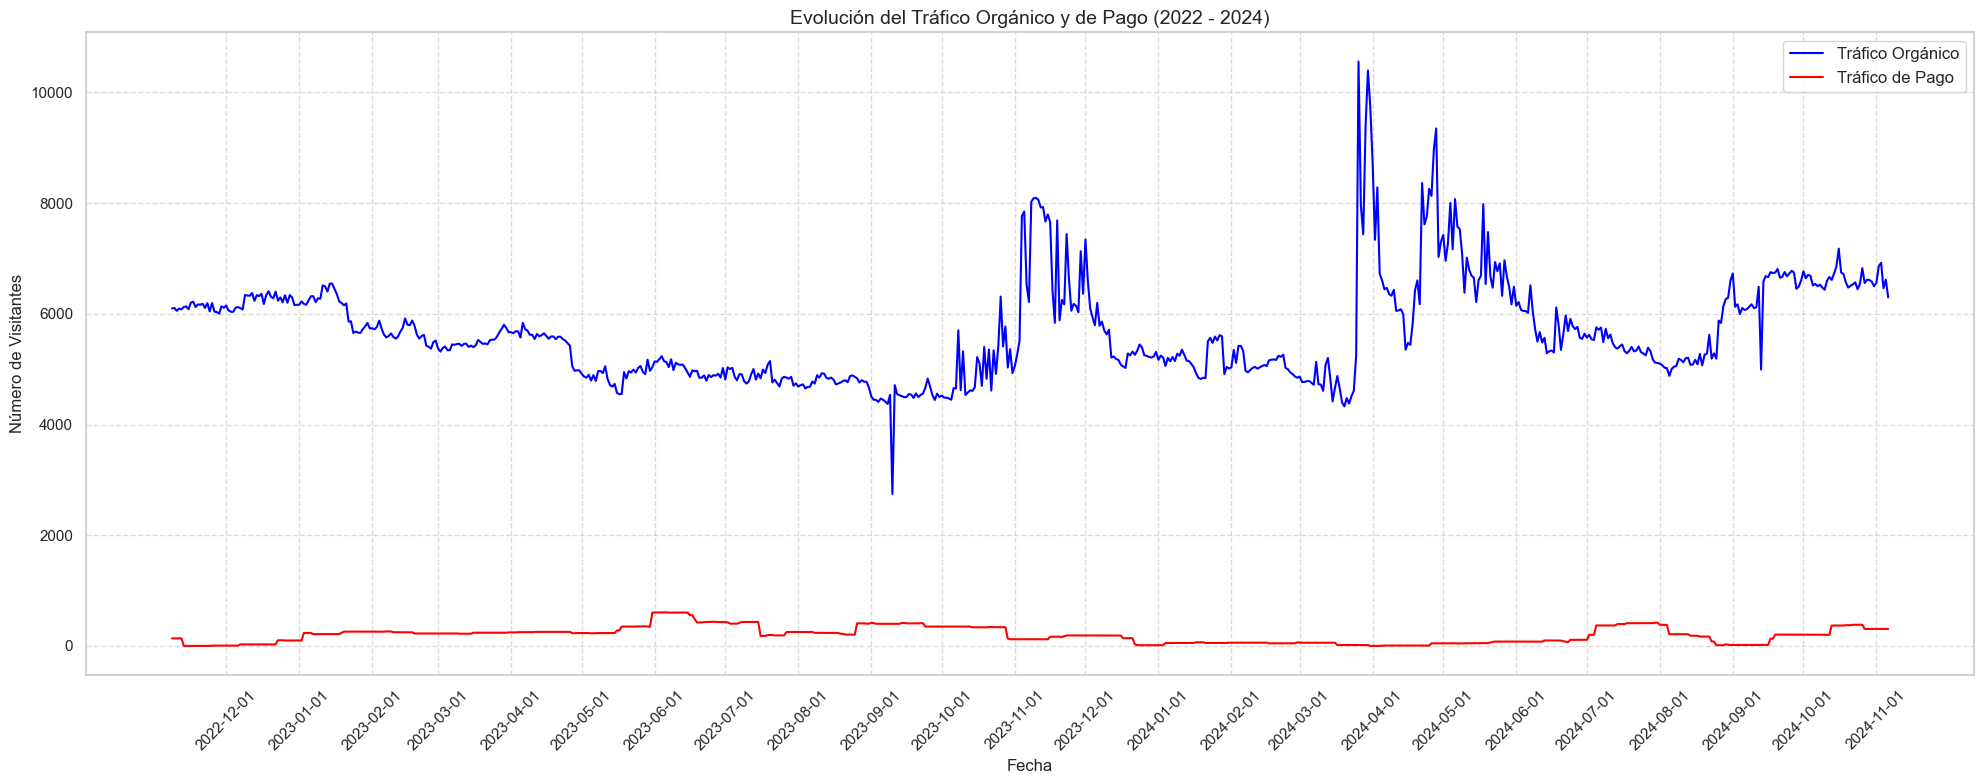

In [66]:
# Ajuste de la gráfica según las indicaciones
plt.figure(figsize=(20, 8))  # Hacer la gráfica más ancha para una mejor visualización

# Crear el lineplot
sns.lineplot(data=df, x="fecha", y="Organic Traffic", label="Tráfico Orgánico", color="blue", linewidth=1.5)
sns.lineplot(data=df, x="fecha", y="Paid Traffic", label="Tráfico de Pago", color="red", linewidth=1.5)

# Personalización del gráfico
plt.title("Evolución del Tráfico Orgánico y de Pago (2022 - 2024)", fontsize=14)
plt.xlabel("Fecha", fontsize=12)
plt.ylabel("Número de Visitantes", fontsize=12)

# Mostrar los meses en el eje X
plt.xticks(pd.date_range(start=df["fecha"].min(), end=df["fecha"].max(), freq='MS'), rotation=45)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
